### Estadistica descriptiva

    Por: Florencio Peralta

In [1]:
import numpy as np
import pandas as pd 
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns

### Análisis descriptivo de FIFA

In [2]:
path = './fifa_datos.csv'
datos_fifa = pd.read_csv(path, header=0, delimiter=',')
datos_fifa = datos_fifa.drop(['Unnamed: 0'], axis=1)
datos_fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### Info general

In [3]:
datos_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

#### Descripción numérica con int64

In [4]:
datos_fifa.describe(include=['int64'])

,ID,Age,Overall,Potential,Special
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908
std,29965.244204,4.669943,6.908930,6.136496,272.586016
min,16.000000,16.000000,46.000000,48.000000,731.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000


#### Descripción numérica con int64

In [5]:
datos_fifa.describe(include=['float64'])

,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


#### Descripción categórica

In [6]:
datos_fifa.describe(include=[object])

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Preferred Foot,Work Rate,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18207,18207,18207,18207,17966,18207,18207,18207,18159,18159,...,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,17194,18207,164,164,651,679,217,144,2,9,...,99,99,99,95,98,108,108,108,98,1244
top,J. Rodríguez,https://cdn.sofifa.org/players/4/19/158023.png,England,https://cdn.sofifa.org/flags/14.png,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€1.1M,€1K,Right,Medium/ Medium,...,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,11,1,1662,1662,33,33,431,4900,13948,9810,...,660,660,660,713,669,634,634,634,669,557


#### Mapa de calor

<AxesSubplot:>

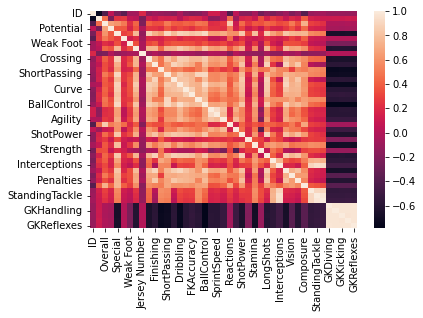

In [7]:
sns.heatmap(datos_fifa.corr())

### Análisis descriptivo de Grupos Económicos, Ecuador

In [8]:
path = './dataset-sri-resumen-v2.csv'
datos_grupo = pd.read_csv(path, header=0, delimiter=',')
datos_grupo.head()

,Ranking (1) Tamaño 2021,Ranking (1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,NUEVO GE,Nombre Grupo Económico,Reporta sus BENEFICIARIOS EFECTIVOS (*),No. de Integrantes domiciliados en PARAÍSOS FISCALES (**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas Naturales (a),Personas Extranjeras (b),...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo (6) 2020,Total Activo (6) 2019,Total Patrimonio (7) 2020,Total Patrimonio (7) 2019,Total Recaudado (8) 2020,Total Recaudado (8) 2019,Total Deuda Generada (9)
0,1,1,0,NaN,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",PARCIALMENTE,2,0,3,1,...,221893.35,3509949,3577970,18949015666,17928760492,3688293052,3699748891,588975950,667872172,NaN
1,2,2,0,NaN,"ALMACENES JUAN ELJURI (BANCO DEL AUSTRO, AEKIA...",PARCIALMENTE,45,42,17,19,...,4339679.14,796827,945874,6417335168,6436090837,1878733441,1955377497,127087663,190328750,NaN
2,3,3,0,NaN,"CORPORACIÓN FAVORITA (COMERCIAL KIWY, SUKASA, ...",PARCIALMENTE,4,5,20,3,...,1617777.87,0,0,3448646302,3343835273,2427005282,2314556018,144524011,139310219,NaN
3,4,5,1,NaN,"BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEI...",SI,2,0,9,0,...,86918.43,4785739,5678838,6014463154,5334073117,784042300,791999072,206200661,234359513,NaN
4,5,4,-1,NaN,SCHLUMBERGER DEL ECUADOR (CONSORCIO SHUSHUFIND...,NO,8,0,0,0,...,237591.28,0,0,3286786210,3616608480,2426480097,2305837270,202204211,152342627,NaN


#### Info general

In [9]:
datos_grupo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 40 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Ranking (1) Tamaño  2021                                                                                      302 non-null    int64  
 1   Ranking (1) Tamaño  2020                                                                                      302 non-null    int64  
 2   Variación Ranking Tamaño 2020 - 2021                                                                          302 non-null    int64  
 3   NUEVO GE                                                                                                      49 non-null     object 
 4   Nombre Grupo Económico                                  

#### Descripción numérica con int64

In [10]:
datos_grupo.describe(include=['int64'])

,Ranking (1) Tamaño 2021,Ranking (1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,No. de Integrantes domiciliados en PARAÍSOS FISCALES (**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas Naturales (a),Personas Extranjeras (b),Sociedades Nacionales (c),Sociedades Extranjeras (d),Contribuyentes Especiales,...,Impuesto a la Renta Causado (4) 2019,Total Ingresos 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo (6) 2020,Total Activo (6) 2019,Total Patrimonio (7) 2020,Total Patrimonio (7) 2019,Total Recaudado (8) 2020,Total Recaudado (8) 2019
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,...,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02
mean,151.500000,151.500000,0.000000,1.506623,1.311258,3.546358,1.112583,19.837748,5.549669,3.705298,...,5.837929e+06,2.350155e+08,7.585266e+04,7.262930e+04,4.347356e+08,4.258298e+08,1.576028e+08,1.542798e+08,1.827717e+07,2.027815e+07
std,87.324109,87.324109,14.639182,4.200730,4.555578,4.225713,2.945898,26.866660,11.436486,5.121375,...,1.409185e+07,3.830884e+08,6.660274e+05,5.962780e+05,1.324460e+09,1.261576e+09,3.428475e+08,3.389915e+08,5.312978e+07,5.759129e+07
min,1.000000,1.000000,-85.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.258247e+06,5.761201e+06,-2.462531e+07,-5.790622e+06,2.530000e+02,2.630000e+02
25%,76.250000,76.250000,-5.750000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,...,5.521930e+05,4.706774e+07,0.000000e+00,0.000000e+00,6.270757e+07,6.581446e+07,2.516836e+07,2.355762e+07,1.697240e+06,2.067543e+06
50%,151.500000,151.500000,1.000000,0.000000,0.000000,2.000000,0.000000,12.500000,2.000000,2.000000,...,1.915175e+06,1.050297e+08,0.000000e+00,0.000000e+00,1.366815e+08,1.439221e+08,5.478062e+07,5.337896e+07,5.080476e+06,6.081486e+06
75%,226.750000,226.750000,7.750000,1.000000,0.000000,5.000000,1.000000,23.750000,6.000000,4.000000,...,4.610328e+06,2.556708e+08,0.000000e+00,0.000000e+00,3.528579e+08,3.479469e+08,1.504091e+08,1.485321e+08,1.125920e+07,1.471770e+07
max,302.000000,302.000000,49.000000,45.000000,42.000000,23.000000,28.000000,328.000000,129.000000,71.000000,...,1.227030e+08,2.919889e+09,9.817255e+06,7.702248e+06,1.894902e+10,1.792876e+10,3.688293e+09,3.699749e+09,5.889760e+08,6.678722e+08


#### Descripción numérica con int64

In [11]:
datos_grupo.describe(include=['float64'])

,Instituciones Financieras (2),Medios de Comunicación (3),Variación Ranking Contribución I.R. 2019-2020,Impuesto Causado ISD 2020,Impuesto Causado ISD 2019,Total Deuda Generada (9)
count,32.000000,27.000000,299.000000,3.020000e+02,3.020000e+02,0.0
mean,1.406250,2.037037,0.618729,2.881508e+06,2.044879e+05,NaN
std,1.131923,1.675192,69.976759,5.198017e+06,5.204052e+05,NaN
min,1.000000,1.000000,-297.000000,0.000000e+00,0.000000e+00,NaN
25%,1.000000,1.000000,-21.500000,1.453319e+05,4.771925e+02,NaN
50%,1.000000,1.000000,10.000000,9.393315e+05,1.636740e+04,NaN
75%,1.000000,2.000000,35.500000,3.349255e+06,1.116971e+05,NaN
max,6.000000,8.000000,284.000000,4.956166e+07,4.339679e+06,NaN


#### Descripción categórica

In [12]:
datos_grupo.describe(include=[object])

,NUEVO GE,Nombre Grupo Económico,Reporta sus BENEFICIARIOS EFECTIVOS (*),Contribución I.R. 2020,Contribución I.R. 2019,Variación Ingresos,Variación Impuesto a la Renta Causado,Variación Contribución I.R. (2020-2019)
count,49,302,302,302,302,302,302,302
unique,1,302,3,286,300,302,287,300
top,X,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",SI,0%,0%,-8.09080697942649%,-100%,0%
freq,49,1,202,17,3,1,14,3


#### Mapa de calor

<AxesSubplot:>

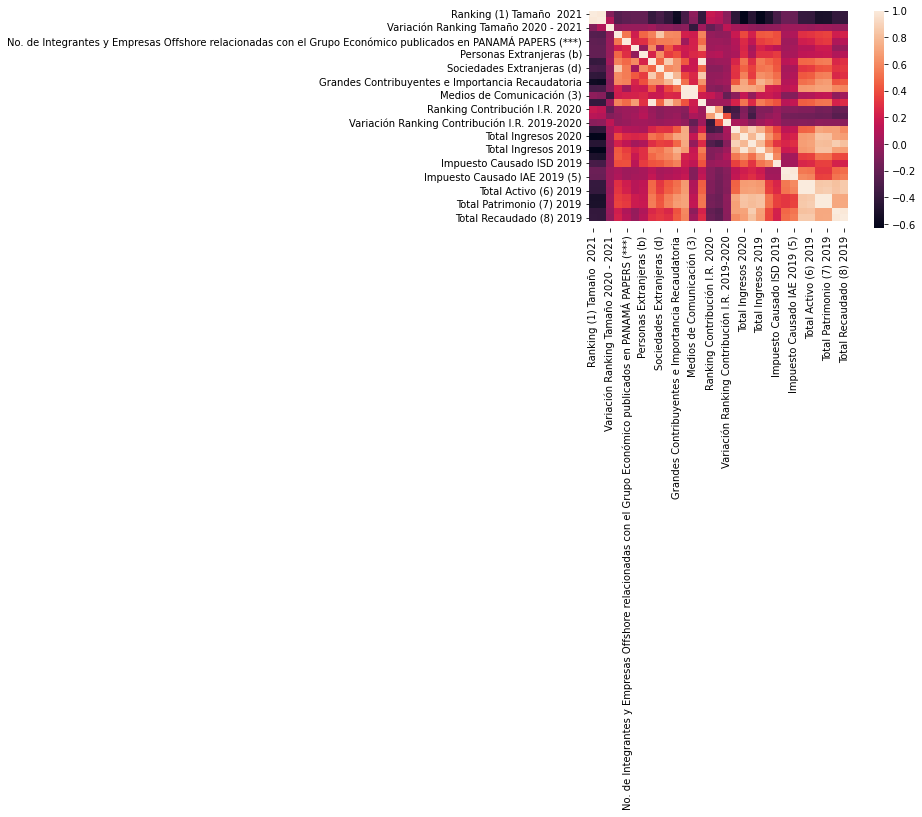

In [13]:
sns.heatmap(datos_grupo.corr())

### Recomendaciones y Conclusiones
**Recomendaciones:**

Siempre se debe ralizar un preprocesado de los datos con los que e van a trabajar, en este caso, para el dataset de Fifa se a eliminado 'Unnamed: 0' ya que no brinda nada de informacion util con la cual trabajar. Ademas de esto, tambien es necesario para eliminar la presencia de celdas vacias que pudieran dañar o alterar la informacion que se desea adquerir. 


**Conclusiones:**

Python ofrece varias librerias y herramientas para realizar la busqueda y representacion patrones en grandes volúmenes de conjuntos de datos para luego buscar una manera de sprovechar esta informacion. Ademas de brindar los recursos mencionados, tambien permite visulizar informacion de los mismo datos utilizado en el estudio. esto con el fin de poder allar la manera mas optima de tratarlos o descartarlos, todo enfocado al fin que se desea obtener al final del estudio.​​
